In [4]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [5]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [6]:
NUM_CLASSES = 36

# Dataset reading

In [7]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [11]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 36)                396       
                                                                 
Total params: 1466 (5.73 KB)
Trainable params: 1466 (5.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [13]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [14]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


78/84 [==========================>...] - ETA: 0s - loss: 3.5694 - accuracy: 0.0479
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.keras
84/84 [==============================] - 1s 3ms/step - loss: 3.5674 - accuracy: 0.0495 - val_loss: 3.5209 - val_accuracy: 0.0970
Epoch 2/1000
48/84 [================>.............] - ETA: 0s - loss: 3.5028 - accuracy: 0.0798
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.keras
84/84 [==============================] - 0s 2ms/step - loss: 3.4899 - accuracy: 0.0797 - val_loss: 3.4297 - val_accuracy: 0.0961
Epoch 3/1000
52/84 [=================>............] - ETA: 0s - loss: 3.4195 - accuracy: 0.0817
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.keras
84/84 [==============================] - 0s 2ms/step - loss: 3.3976 - accuracy: 0.0860 - val_loss: 3.2965 - val_accuracy: 0.1243
Epoch 4/1000
52/84 [=================>............] - ETA: 0s - loss: 3.3060 - accuracy: 0.1

In [15]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

28/28 [==============================] - 0s 1ms/step - loss: 1.3878 - accuracy: 0.5937


In [16]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [17]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 66ms/step
[2.59971857e-04 1.54353518e-04 5.94894029e-02 1.51132457e-02
 2.18697614e-03 6.85319479e-04 8.02791025e-03 1.26516782e-02
 5.37749620e-05 5.22445131e-04 6.47987918e-06 3.62052885e-03
 3.32229014e-04 2.33539660e-03 1.60185958e-03 9.43920284e-04
 3.56432793e-05 5.04519604e-02 2.56284675e-05 3.41994905e-06
 1.02673724e-01 1.71398528e-06 4.29500767e-04 5.70080709e-04
 4.43148921e-04 2.69403898e-07 1.82843913e-04 2.94773787e-01
 3.11250100e-03 1.44673116e-03 1.60160750e-01 2.54009336e-01
 2.36831103e-02 3.41524947e-06 1.83255452e-10 6.88519685e-06]
27


# Confusion matrix

112/112 [==============================] - 0s 797us/step


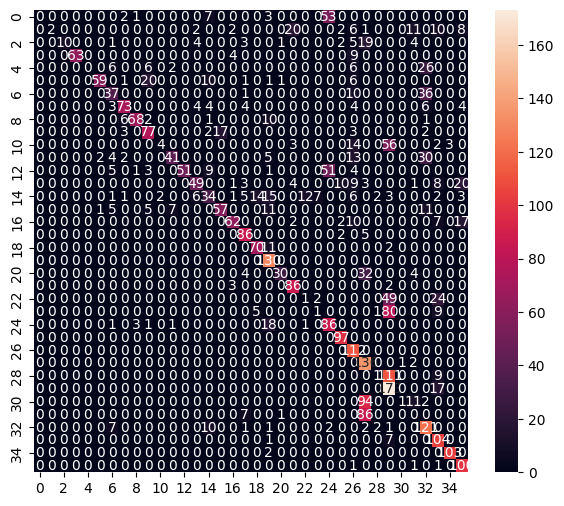

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       1.00      0.03      0.06        64
           2       1.00      0.20      0.34        49
           3       1.00      0.83      0.91        76
           4       0.00      0.00      0.00        46
           5       0.95      0.60      0.73        99
           6       0.53      0.44      0.48        84
           7       0.83      0.72      0.77       102
           8       0.93      0.77      0.84        88
           9       0.68      0.74      0.71       104
          10       0.67      0.05      0.09        82
          11       0.80      0.42      0.55        97
          12       1.00      0.41      0.58       125
          13       0.75      0.45      0.57       108
          14       0.44      0.30      0.36       114
          15       0.77      0.59      0.67        97
          16       0.85      0.62      0.72       100
     

c:\Users\asusg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asusg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asusg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [22]:
# Save as a model dedicated to inference
model.save(model_save_path)

In [23]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\asusg\AppData\Local\Temp\tmpxm0smcps\assets


INFO:tensorflow:Assets written to: C:\Users\asusg\AppData\Local\Temp\tmpxm0smcps\assets


7952

# Inference test

In [24]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [25]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [26]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [27]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2 ms


In [28]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.5997186e-04 1.5435305e-04 5.9489399e-02 1.5113244e-02 2.1869759e-03
 6.8531942e-04 8.0279093e-03 1.2651676e-02 5.3774856e-05 5.2244536e-04
 6.4798601e-06 3.6205284e-03 3.3222881e-04 2.3353919e-03 1.6018586e-03
 9.4392017e-04 3.5643141e-05 5.0451942e-02 2.5628415e-05 3.4199356e-06
 1.0267375e-01 1.7139768e-06 4.2950010e-04 5.7008007e-04 4.4314863e-04
 2.6940231e-07 1.8284346e-04 2.9477376e-01 3.1125008e-03 1.4467282e-03
 1.6016082e-01 2.5400937e-01 2.3683107e-02 3.4152324e-06 1.8325401e-10
 6.8851564e-06]
27
